# Chap04 - 아무도 알려주지 않는 위대한 이론

## 4.1 서론

이번 장은 통계학 책에서는 거의 나오지 않는 아이디어에 대해 다뤄 본다.

## 4.2 큰 수의 법칙 - The Law of Large Numbers

$Z_i$를 어떤 확률분포에서 얻은 $N$개의 독립 표본이라고 하면, 큰 수의 법칙에 따라 기대값 $\text{E}[Z]$는 다음과 같이 나타낼 수 있다.

$$
\frac{1}{N} \sum _{ i=1 }^{ N }{ Z_i } \rightarrow E \left[ Z \right], \quad N\rightarrow  \infty 
$$

위의 식을 말로 표현하면,

> ***같은 분포에서 나온 확률변수집합의 평균은 그 분포의 기대값으로 수렴한다.***

### 4.2.1 직관

큰 수의 법칙에 대해 간단한 예제를 사용하여 알아보자.

확률변수 $Z$는 두 가지 값, 즉 $c_1$ 또는 $c_2$만 가질 수 있고, $Z$ 표본을 많이 가지고 있다고 가정하고, 특정 표본을 $Z_i$라고 표시한다. 큰 수의 법칙에 따르면 모든 표본의 평균을 구하여 $Z$의 기대값에 가까운 값을 구할 수 있다. 평균은 다음과 같다.

$$
\frac{1}{N} \sum _{ i=1 }^{ N }{ Z_i }
$$

수식을 풀어보면, $Z_i$가 $c_1$ 또는 $c_2$만 가지므로 전체의 합을 이 두값에 대한 합으로 나눌 수 있다.

$$
\begin{eqnarray} \frac { 1 }{ N } \sum _{ i=1 }^{ N }{ Z_{ i } }  & = & \frac { 1 }{ N } \left( \sum _{ Z_{ i }=c_{ 1 } }^{  }{ c_{ 1 } } +\sum _{ Z_{ i }=c_{ 2 } }^{  }{ c_{ 2 } }  \right)  \\  & = & c_{ 1 }\sum _{ Z_{ i }=c_{ 1 } }^{  }{ \frac { 1 }{ N }  } +c_{ 2 }\sum _{ Z_{ i }=c_{ 2 } }^{  }{ \frac { 1 }{ N }  }  \\  & = & c_1 \times (\text{approximate frequency of } c_1) + c_2 \times (\text{approximate frequency of } c_2) \\  & \approx & c_1 \times P(Z = c_1) + c_2 \times P(Z=c_2) \\  & = & E[Z] \end{eqnarray}
$$

$N \rightarrow \infty$ 일 경우 등호($=$)가 유효하다. 큰 수의 법칙은 거의 모든 분포에 유효하다. 

### 4.2.2 예제: 푸아송 확률변수의 수렴

`sample_size = 100000`로 모수 $\lambda = 4.5$인 푸아송 확률변수를 표본추출하자(푸아송 확률변수의 기대값은  그 모수와 같다). $n=1$ 부터 `sample_size`까지 첫 표본 $n$개의 평균을 계산해보자.

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt 
import numpy as np
import pymc as pm
from IPython.core.pylabtools import figsize

matplotlib.rc('font', family='NanumGothic')  # Linumx
# matplotlib.rc('font', family='AppleGothic')  # Mac

plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300

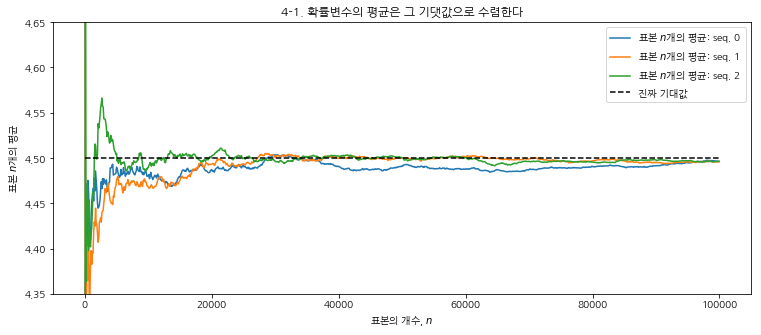

In [2]:
figsize(12.5, 5)

sample_size = 100000
expected_value = lambda_ = 4.5

poi = pm.rpoisson
# 1, 101, 201, ~ 
N_samples = range(1, sample_size, 100)

for k in range(3):
    samples = poi(lambda_, size=sample_size)
    partial_average = [samples[:i].mean() for i in N_samples]
    plt.plot(N_samples, partial_average, lw=1.5, label='표본 $n$개의 평균: seq. %d' % k)

plt.plot(N_samples, expected_value * np.ones_like(partial_average), 
        ls="--", label='진짜 기대값', c='k')
plt.ylim(4.35, 4.65)
plt.title("4-1. 확률변수의 평균은 그 기댓값으로 수렴한다")
plt.ylabel("표본 $n$개의 평균")
plt.xlabel("표본의 개수, $n$")
plt.legend();

위의 그래프에서 표본의 크기가 작을 때 평균의 변동이 크다는 것을 알 수 있다. 위의 세 개의 표본 $n$개의 평균은 모두 $4.5$로 **수렴(convergence)**한다.

그러면, 다음의 질문에 대해 생각해 보자.

> **"얼마나 빨리 기대값에 수렴할 수 있는가?"**

특정 $n$에 대해 수천 번의 시행을 하고, 진짜 기대값에서 평균이 얼마나 떨어져 있는지 계산해보자. 

$$
D(n) = \sqrt { E\left[ \left( \frac { 1 }{ n } \sum _{ i=1 }^{ n }{ Z_{ i } } -4.5 \right) ^{ 2 } \right] } 
$$

위의 수식은 어떤 $n$의 진짜 값(평균)에서 떨어진 거리로 해석할 수 있다. 위의 식을 다음과 같이 나타낼 수 있다.

$$
Y_{n, k} = \left( \frac { 1 }{ n } \sum _{ i=1 }^{ n }{ Z_{ i } } -4.5 \right)^{2}
$$

$Y_{n, k}$를 여러 번 계산하는데, 매 계산마다 새로운 $Z_i$를 가지고 계산한 다음, 평균을 계산한다.

$$
\frac{1}{N} \sum _{ i=1 }^{ n }{Y_{n,k}} \rightarrow E[Y_n] = E\left[ \left( \frac { 1 }{ n } \sum _{ i=1 }^{ n }{ Z_{ i } } -4.5 \right) ^{ 2 } \right]
$$

마지막에 제곱근을 취하면 다음과 같다.

$$
\sqrt{\frac{1}{N} \sum _{ i=1 }^{ n }{Y_{n,k}}} \approx D(n)
$$

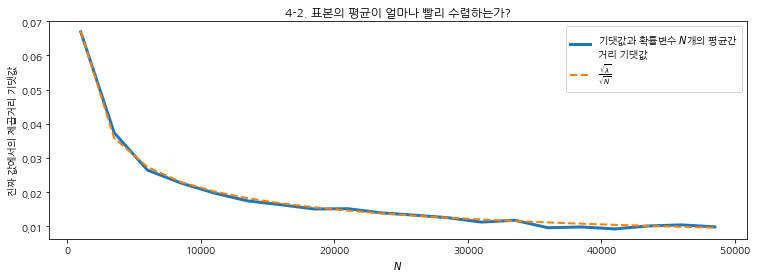

In [3]:
figsize(12.5, 4)

N_Y = 250  # D(N)에 근사하기 위해 크게 잡는다.
N_array = np.arange(1000, 50000, 2500)  # 변수에 많은 표본을 근사
D_N_results = np.zeros(len(N_array))

lambda_ = 4.5
expected_value = lambda_

def D_N(n):
    '''이 함수는 표본 n개를 사용한 평균분산인 D_n에 근사한다.'''
    Z = poi(lambda_, size=(n, N_Y))
    average_Z = Z.mean(axis=0)
    return np.sqrt(((average_Z - expected_value)**2).mean())

for i, n in enumerate(N_array):
    D_N_results[i] = D_N(n)
    
plt.xlabel("$N$")
plt.ylabel("진짜 값에서의 제곱거리 기댓값")
plt.plot(N_array, D_N_results, lw=3,label="기댓값과 확률변수 $N$개의 평균간\n거리 기댓값")
plt.plot(N_array, np.sqrt(expected_value) / np.sqrt(N_array), lw=2, ls="--",
         label=r"$\frac{\sqrt{\lambda}}{\sqrt{N}}$")
plt.legend()
plt.title("4-2. 표본의 평균이 얼마나 빨리 수렴하는가?");

위의 그래프에서 알 수 있듯이 표본의 평균과 실제 기대값 사이의 거리(차이)는 $N$이 증가할수록 줄어든다. 여기서 수렴률이 감소하는 것에 주목해보자. 즉, 0.020에서 0.015(0.005의 차이)로 이동하기 위해 추가 표본 10,000개가 필요하다. 그리고 거기에 표본 20,000개를 더하면 0.015에서 0.010으로 줄어든다.

In [4]:
print(np.sqrt(expected_value) / np.sqrt(10000), 
      '→', np.sqrt(expected_value) / np.sqrt(20000),
      '→', np.sqrt(expected_value) / np.sqrt(40000))

0.0212132034356 → 0.015 → 0.0106066017178


따라서, 수렴률을 측정할 수 있다. 위의 그래프에서 주황색 점선, 함수 $\frac{\sqrt{\lambda}}{\sqrt{N}}$을 그렸다. 

대개의 경우 $Z$와 같은 일련의 확률변수가 주어지면 **큰 수의 법칙**에서 $E[Z]$의 수렴률은 다음과 같다.

$$
\frac{\sqrt{Var[Z]}}{\sqrt{N}}
$$

### 4.2.3 $\text{Var}(Z)$를 어떻게 계산할까?

분산은 근사치가 될 수 있는 또 다른 기대값이라 할 수 있다. 

기대값(큰 수의 법칙을 사용하여 추정하고, 이를 $\mu$로 표시)을 알면 분산을 추정할 수 있다.

$$
\frac{1}{N} \sum _{ i=1 }^{ N }{ \left( Z_{ i }-\mu  \right)^{2}} \rightarrow E\left[ \left( Z-\mu \right)^{2}  \right] = \text{Var}(Z) 
$$

### 4.2.4 기대값과 확률

기대값과 추정한 확률 사이에는 명확한 관계가 보이지 않는다. **지시함수**(indicator function)을 다음과 같이 정의해보자.

$$
\nVdash =\begin{cases} 1\quad x \in A \\ 0 \quad else \end{cases}
$$

큰 수의 법칙에 따라 표본 $X_i$가 많으면 다음과 같이 $P(A)$라고 표시한 사건 $A$의 확률을 추정할 수 있다.

$$
\frac{1}{N} \sum _{ i=1 }^{ N }{ \nVdash_A(X_i) } \rightarrow E\left[ \nVdash_A(X) \right] = P(A) 
$$

위의 식에서 지시함수는 사건이 발생한 경우에만 1을 가지므로, 사건이 발생한 횟수만 합친 뒤 전체 시행의 수로 나눈다(보통 빈도를 사용하여 확률을 추정한다). 

예를 들어 $Z \sim \text{Exp}(0.5)$가 $10$보다 클 확률을 추정하고 싶고, $\text{Exp}(0.5)$ 분포에서 표본을 많이 얻었다고 하자.

$$
P(Z > 10) = \sum _{ i=1 }^{ N }{ \nVdash_{z>10}(Z_i) } 
$$

In [5]:
# import pymc as pm

N= 10000
print(np.mean([pm.rexponential(0.5) > 10 for i in range(N)]))

0.0057


### 4.2.5 이 모든 것이 베이지안 통계와 무슨 상관이 있을까?

만약 사후확률분포에서 직접 표본을 얻을 수 있다면, 필요한 것은 단지 평균을 계산하는 것뿐이다. 

- 정확도가 우선이라면, 얼마나 빨리 수렴하는지 보여주면 된다. → 그래프 4-2
- 더 정확하기를 원한다면 사후확률분포에서 표본을 더 가져오면 된다.

> **언제쯤이면 충분할까? 사후확률분포에서 표본을 추출하는 것을 언제 멈추어야 할까?**

위의 질문에 대한 답은 실무자의 의사결정과 표본의 분산에 달려있다(큰 분산은 평균이 느리게 수렴한다.)

또한, 큰 수의 법칙이 통하지 않는 경우도 알아야 한다. 이름 자체에서 알 수 있듯이 이 법칙은 표본의 수가 많을 때만 통한다. 

## 4.3 작은 수의 혼란

큰 수의 법칙은 $N$이 무한히 커져 결코 도달할 수 없는 경우에만 유효하다(그럼 못 쓴다는거 아닌가?...). 따라서, 큰 수의 법칙을 아무데나 적용하는 것은 옳지 못하다.

### 4.3.1 예제: 통합된(Aggregated) 지리 데이터

데이터는 종종 통합된 형태로 주어진다. 예를 들어 데이터는 나라(state), 카운티(county, 행정구역 단위), 도시(city)별로 그룹화할 수 있다. 만일 데이터가 각 지역의 몇몇 특성을 평균한 것이라면, 큰 수의 법칙을 고려하여 이 법칙이 인구수가 적은 지역에서는 통하지 않을 수 있다는 것을 염두해 두어야 한다.

작은 데이터 셋을 놓고 관찰해보도록 하자. 

- 데이터셋에 카운티(county)가 5,000개 있다고 가정
- 각 카운티의 인구수는 100 ~ 1,500명 사이의 균등분포를 가짐
- 각 카운티 사람들의 **평균 키** 를 측정하고 싶다.
- 미지수인 **키** 는 카운티별로 크게 변하지 않는다.

각 개인은 아래와 같이 같은 키 분포를 가지고 있어 거주하는 카운티와는 독립적이다.

$$
\text{height} \sim \text{Normal}(150, 15)
$$

현재 우리가 가지고 있는 데이터는 카운티 단위로 개인을 취합한 카운티 평균 데이터만 가지고 있다고 하자.

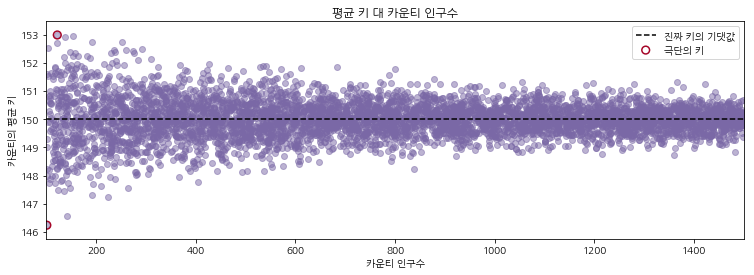

In [6]:
figsize(12.5, 4)
std_height = 15
mean_height = 150

n_counties = 5000
pop_generator = pm.rdiscrete_uniform
norm = pm.rnormal

# 인위적인 인구수를 만든다.
population = pop_generator(100, 1500, size=n_counties)

average_across_county = np.zeros(n_counties)
for i in range(n_counties):
    # generate some individuals and take the mean
    # 개인의 키를 만들고 평균을 취한다.
    average_across_county[i] = norm(mean_height, 1./(std_height**2),
                                    size=population[i]).mean()
    
# 극단적인 평균 키를 보여주는 카운티를 정한다.
i_min = np.argmin(average_across_county)
i_max = np.argmax(average_across_county)

# 인구수에 따른 평균을 plotting 한다.
plt.scatter(population, average_across_county, alpha=0.5, c="#7A68A6")
plt.scatter([population[i_min], population[i_max]],
            [average_across_county[i_min], average_across_county[i_max]],
            s=60, marker="o", facecolors="none",
            edgecolors="#A60628", linewidths=1.5,
            label="극단의 키")

plt.xlim(100, 1500)
plt.title("평균 키 대 카운티 인구수")
plt.xlabel("카운티 인구수")
plt.ylabel("카운티의 평균 키")
plt.plot([100, 1500], [150, 150], color="k", label="진짜 키의 \
기댓값", ls="--")
plt.legend(scatterpoints=1);

> 위의 그래프에서 무엇을 관측하려 하는가?

인구수를 고려하지 않으면 심각한 추론 오류를 일으킬 위험이 있다. 

만약 인구수를 고려하지 않는다면 키가 가장 작은 사람과 가장 큰 사람이 있는 카운티는 위의 그래프에서 붉은 색 점이라고 할 수 있다. 하지만 이러한 추론은 틀린 추론이다. 그 이유는 위의 붉은 색 점인 두 카운티가 반드시 극단의 키를 가졌다고 할 수 없다. 이러한 오류는 인구수가 작은 카운티의 평균이 인구의 진짜 기대값($\mu=150$)을 적절히 반영하지 못한 결과다. 따라서, 표본의 크기가 작은 경우 큰 수의 법칙이 효과적이지 못하다. 

위에서 각 카운티의 인구수는 100 ~ 1,500명 사이에 균등하게 분포되어 있다고 가정했다. 그렇다면 가장 극단적인 키(가장 작거나 큰)를 가진 카운티는 100 ~ 1,500명 사이에서 균등하게 분포되어야 한다. 하지만 아래의 출력결과를 보면 그렇지 않다.

In [7]:
print("가장 키가 작은 10개의 카운티 인구수: ")
print(population[np.argsort(average_across_county)[:10]])
print("\n가장 키가 큰 10개의 카운티 인구수: ")
print(population[np.argsort(-average_across_county)[:10]])

가장 키가 작은 10개의 카운티 인구수: 
[101 142 224 192 136 124 148 263 210 193]

가장 키가 큰 10개의 카운티 인구수: 
[122 154 137 252 191 121 104 292 260 235]


### 4.3.2 예제: 캐글의 미국 인구조사 우편물 회신율 챌린지

이번에는 2010년 미국 인구 조사국의 데이터로 인구수를 카운티 단위가 아닌 블록그룹 단위(도시 블록 또는 동등한 단위를 모은 것)로 구분해놓은 데이터셋이다. 분석 목표는 *블록그룹의 인구조사 우편물 회신율을 예측* 하는 것이다. 회신율은 인구조사변수(소득중앙값, 블록그룹 내 여성의 수, 트레일러 주차장, 평균 자녀수 등)를 사용하여 0 ~ 100 사이의 값으로 측정된다. 아래의 그래프는 우편물 회신율 대 블록그룹 인구수를 나타낸 그래프다.

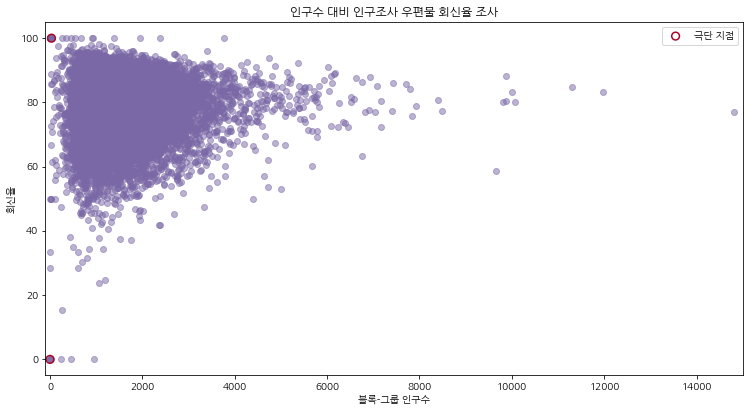

In [8]:
figsize(12.5, 6.5)
data = np.genfromtxt("./data/census_data.csv", skip_header=1, delimiter=",")
plt.scatter(data[:, 1], data[:, 0], alpha=0.5, c="#7A68A6")
plt.title("인구수 대비 인구조사 우편물 회신율 조사")
plt.ylabel("회신율")
plt.xlabel("블록-그룹 인구수")
plt.xlim(-100, 15e3)
plt.ylim(-5, 105)

i_min = np.argmin(data[:, 0])
i_max = np.argmax(data[:, 0])

plt.scatter([data[i_min, 1], data[i_max, 1]],
            [data[i_min, 0], data[i_max, 0]],
            s=60, marker="o", facecolors="none",
            edgecolors="#A60628", linewidths=1.5,
            label="극단 지점")

plt.legend(scatterpoints=1);

### 4.3.3 예제: 레딧 코멘트 정렬하기/추려내기

레딧([Reddit](https://www.reddit.com/))은 소셜 뉴스 웹사이트로 자신이 쓴 글을 등록하고 그 글을 다른 사용자들의 투표를 통해 "up" 혹은 "down" 선택해 순위에 따라 주제별 섹션이나 메인 페이지에 올라가게 된다. 

- 레딧은 이야기나 이미지 링크를 모은다. 
- 레딧의 가장 인기 있는 부분은 각 링크와 관련된 코멘트(댓글)다. 
- '레디터(Redditor, 레딧 사용자)'는 각 코멘트에 대해 up이나 down에 투표한다(이를 각각 upvote와 downvote라고 부른다). 
- 레딧은 기본적으로 최고의(Top) 코멘트를 기준으로 코멘트를 정렬한다.

어느 코멘트가 최고인지 어떻게 판단할 것인가?

1. **인기(Popularity)** : upvote가 많을수록 좋은 코멘트로 평가된다. 하지만 upvote가 수백 개인 코멘트는 downvote도 수천 개라는 점이다. **인기**가 많다면 그 코멘트는 최고보다는 논쟁거리일 가능성이 크다.
2. **차이(Difference)** : upvote와 downvote의 **차이**를 이용한다. 이방법은 위의 인기를 이용한 모델의 문제를 해결하지만, 코멘트의 시간적 속성을 고려한다면 실패한다. 원본 링크가 나온 후 수많은 시간 동안 코멘트가 올라올 것이다. 차이를 이용한 방법은 가장 오래된 코멘트가 **최고의** 코멘트라고 편향되게 보여줄 것이다. 오래된 코멘트는 새로운 코멘트보다 더 많은 upvote를 누적하지만 반드시 최고는 아니다.
3. **시간 보정(Time adjusted)** : 두 번째 항목인 차이를 코멘트의 경과시간으로 나눈 것을 고려한 것이다. 이 방법은 **초당** 또는 **분당 차이** 같은 **비율**을 만든다. 그러나 반대로 만약 초당 차이를 사용한다면 upvote를 한 개 받은 1-second-old 코멘트가 upvote를 99개 받은 100-second0old 코멘트보다 나을 것이다. `t-second-old` 코멘트만 고려한다면 이런 문제점을 피할 수 있다. 그러면 좋은 `t`값은 무엇인가? `t`보다 적은 시간을 가진 코멘트는 안 좋다는 의미인가?
4. **비율(Ratio)** : 전체 투표수(upvotes + downvotes) 대비 upvote의 비율로 코멘트를 평가하는 방법이다. 이 방법은 시간 문제(temporal issue)를 해결한다. 전체 투표수 대비 많은 upvote를 가져 점수가 높은 새 코멘트는 더 오래된 코멘트처럼 최고가 될 수 있다. 여기서 문제점은 upvote 1개를 가진 코멘트(`ratio=1.0`)는 upvote 999개와 downvote 1개를 가진 코멘트(`ratio=0.999`)보다 더 나은 코멘트가 된다는 점이다. 그러나 후자가 '더 나은' 코멘트일 **가능성이 크다..**



위의 4번에 대해 좀더 알아보자. 

**진짜** upvote **비율** 추정치다. 

> 진짜 upvote 비율은 "누군가 이 코멘트에 downvote 대비 upvote를 줄 수 있는 기본적인 확률은 얼마인가?" 라고 생각할 수 있다.

따라서, 999 upvote vs. 1 downvote 코멘트는 1에 가까운 진짜 upvote 비율을 가진다(큰 수의 법칙에 따라). 반면, upvote가 1개인 코멘트의 upvote 비율에 대해서는 확신하지 못한다. 베이지안 문제로 보자.

upvote 비율에 대한 사전확률을 알아내는 한 가지 방법은 과거 upvote 비율의 분포를 보는 것이다. 레딧의 코멘트를 스크랩핑하여 분포를 알아낼 수 있다. 그러나 이 방법에는 몇 가지 문제점이 있다.

1. **Skewed 데이터** : 대다수 코멘트는 투표수가 매우 적다. 그래서 극단적인 비율의 코멘트가 많을 것이다. 이는 분포를 심하게 비대칭으로 만든다. 
2. **Biased 데이터**: 레딧은 **서브레딧(subreddit)** 이라고 부르는 여러 하위 페이지(게시판)로 구성되어 있다. 따라서, 게시판의 성격에 따라 같은 사진이나 글을 포스팅하더라도 코멘트가 다르게 나타날 것이다.

In [11]:
from IPython.core.display import Image
# %run 뒤에 숫자를 붙여 호출하면 상단 i 번째 사진을 가져온다.
%run top_pic_comments.py 7

Title of submission: 
 My 101 year old neighbor was so ready for the eclipse.
http://i.imgur.com/QZXvR1L.jpg


In [12]:
"""
Contents: 사진의 모든 코멘트에서 얻은 텍스트의 배열
Votes: 각 코멘트에 대한 2차원 Numpy 형식의 [upvotes, downvotes] 배열
"""
n_comments = len(contents)
comments = np.random.randint(n_comments, size=4)
print("Some Submissions (out of %d total) \n-----------"%n_comments)
for i in comments:
    print('"' + contents[i] + '"')
    print("upvotes/downvotes: ",votes[i,:])
    print('\n')

Some Submissions (out of 154 total) 
-----------
"Grams! Classic!"
upvotes/downvotes:  [2 0]


"Your neighbor looks like a fun lady :)"
upvotes/downvotes:  [2 0]


"10 buck$ she lives till the 2024 one."
upvotes/downvotes:  [2 0]


"r/gonewild
"
upvotes/downvotes:  [3 0]




upvote 비율 $p$와 vote $N$개가 주어진 경우 upvote의 수는 모수가 $p$와 $N$인 이항확률변수처럼 보인다. $p$에 대해 베이지안 추정을 해보자.

In [13]:
# import pymc as pm

def posterior_upvote_ratio(upvotes, downvotes, samples=20000):
    """
    이 함수는 어느 특정 제안에 대한 upvote와 downvote의 수를 받는다. 
    그런다음 사후표본의 개수를 돌려준다. 균등분포를 사전확률분포로 가정한다.
    """
    N = upvotes + downvotes
    upvote_ratio = pm.Uniform("upvote_ratio", 0, 1)
    observations = pm.Binomial("obs", N, upvote_ratio, value=upvotes, observed=True)
    model = pm.Model([upvote_ratio, observations])
    # MAP을 이용해 fitting을 한다. 
    map_ = pm.MAP(model).fit()
    mcmc = pm.MCMC(model)
    mcmc.sample(samples, samples/4)
    return mcmc.trace("upvote_ratio")[:]

 [-----------------100%-----------------] 20000 of 20000 complete in 1.1 sec

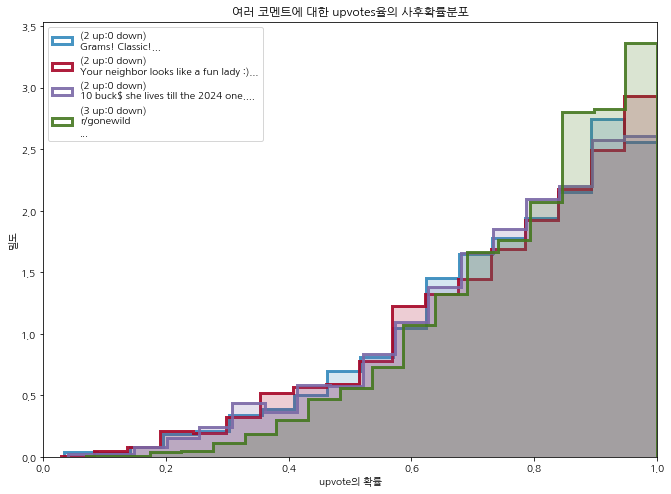

In [15]:
figsize(11., 8)
posteriors = []
colours = ["#348ABD", "#A60628", "#7A68A6", "#467821", "#CF4457"]
for i in range(len(comments)):
    j = comments[i]
    label = '(%d up:%d down)\n%s...'%(votes[j, 0], votes[j,1],contents[j][:50])
    posteriors.append(posterior_upvote_ratio(votes[j, 0], votes[j, 1]))
    plt.hist(posteriors[i], bins=18, density=True, alpha=.9,histtype="step", color=colours[i%5], lw=3,label=label)
    plt.hist(posteriors[i], bins=18, density=True, alpha=.2,histtype="stepfilled", color=colours[i], lw=3)
    
plt.legend(loc="upper left")
plt.xlim(0, 1)
plt.ylabel("밀도")
plt.xlabel("upvote의 확률")
plt.title("여러 코멘트에 대한 upvotes율의 사후확률분포");

### 4.3.4 추리기

**95% 최소 가능값**을 이용해보자. 95% 최소 가능값이란 진짜 모수가 더 낮을 가능성이 겨우 5%라는 것을 의미한다.

[1 0 2 3] [0.474099840662008, 0.63686917399731402, 0.37530972427447684, 0.34755194393585032]


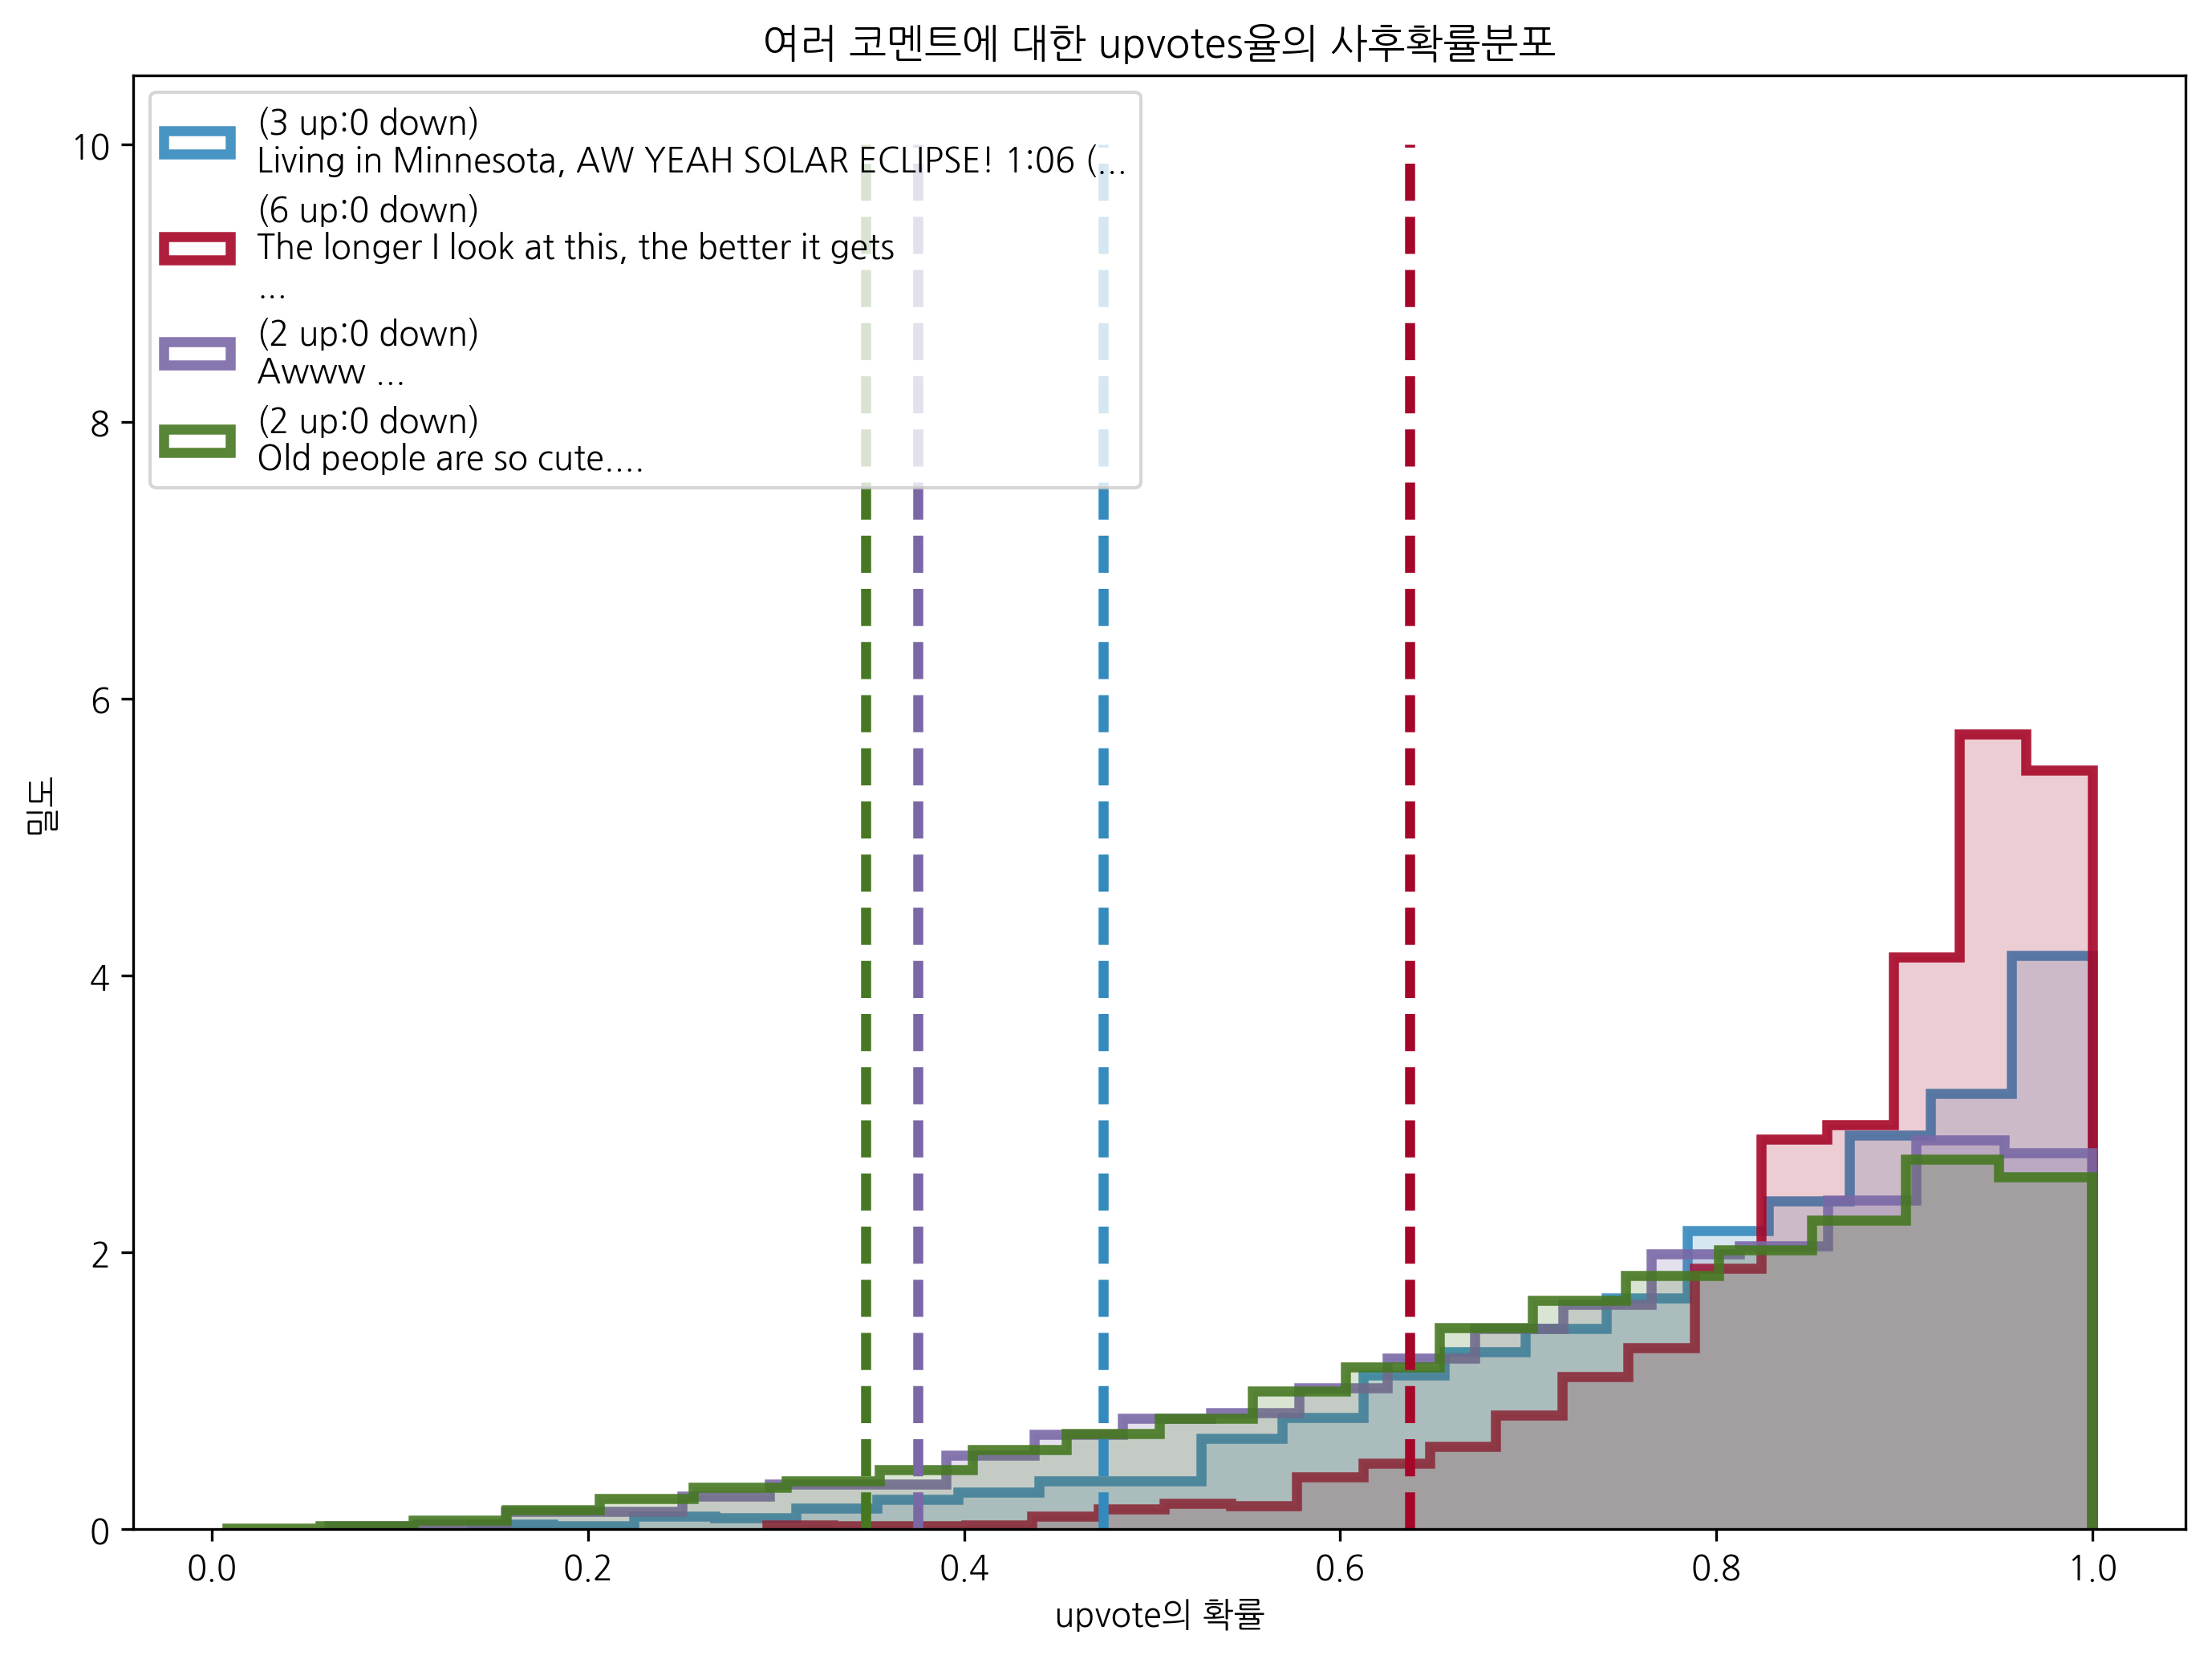

In [48]:
N = posteriors[0].shape[0]
lower_limits = []

for i in range(len(comments)):
    j = comments[i]
    plt.hist(posteriors[i], bins=20, density=True, alpha=.9,
             histtype="step", color=colours[i], lw=3,
             label='(%d up:%d down)\n%s...' % (votes[j, 0], votes[j, 1], contents[j][:50]))
    plt.hist(posteriors[i], bins=20, density=True, alpha=.2,
             histtype="stepfilled", color=colours[i], lw=3, )
    v = np.sort(posteriors[i])[int(0.05 * N)]
    plt.vlines(v, 0, 10, color=colours[i], linestyles="--", linewidths=3)
    lower_limits.append(v)
    plt.legend(loc="upper left")

plt.legend(loc="upper left")
plt.xlabel("upvote의 확률")
plt.ylabel("밀도")
plt.title("여러 코멘트에 대한 upvotes율의 사후확률분포");
order = np.argsort(-np.array(lower_limits))
print(order, lower_limits)

### 4.3.5 그러나 이 방법은 실시간에서는 너무 느리다

모든 코멘트의 사후확률분포를 계산하는 데는 시간이 오래걸릴 뿐만아니라, 계산이 끝난 뒤 코멘트의 upvote와 downvote의 개수가 변했을 가능성이 크다. 따라서, 다음과 같은 수식을 사용하여 하한선을 빠르게 계산해보자. 아래의 식은 베타분포([Beta distribution](https://datascienceschool.net/view-notebook/70a372b9c14a4e8d9d49737f0b5a3c97/))에 대한 [95% 신뢰구간](http://math7.tistory.com/65)(하한선) 계산식이다.

$$
\frac{a}{a+b} - 1.65 \sqrt{\frac{ab}{(a+b)^2 (a+b+1)}}
$$

$$
a = 1+\text{# of upvote}, \quad b = 1 + \text{# of downvote}
$$

In [16]:
def intervals(u, d):
    a = 1. + u
    b = 1. + d
    mu = a / (a+b)
    std_err = 1.65 * np.sqrt((a*b)/((a+b)**2 * (a+b+1.)))
    return (mu, std_err)

print("하한선 근삿값:")
posterior_mean, std_err = intervals(votes[:, 0], votes[:, 1])
lb = posterior_mean - std_err
print(lb)
print("\n")
print("하한선 근삿값에 따라 추린 상위 40:")
print("\n")
order = np.argsort(-lb)
ordered_contents = []
for i in order[:40]:
    ordered_contents.append(contents[i])
    print(votes[i, 0], votes[i, 1], contents[i])
    print("-------------")

하한선 근삿값:
[ 0.27775794  0.9997412   0.99971584  0.99959694  0.99906513  0.99788444
  0.99449777  0.99553589  0.99258996  0.98031543  0.97907178  0.98350175
  0.96713122  0.91054995  0.90047257  0.94765353  0.91347044  0.84966853
  0.83043776  0.90047257  0.79018506  0.92118984  0.6931046   0.89239065
  0.87746603  0.83043776  0.6530083   0.6530083   0.53055613  0.88288047
  0.79018506  0.53055613  0.53055613  0.53055613  0.53055613  0.53055613
  0.53055613  0.53055613  0.53055613  0.53055613  0.53055613  0.53055613
  0.53055613  0.53055613  0.53055613  0.53055613  0.53055613  0.53055613
  0.53055613  0.53055613  0.53055613  0.53055613  0.53055613  0.53055613
  0.53055613  0.53055613  0.53055613  0.53055613  0.53055613  0.98787868
  0.6530083   0.6530083   0.75075188  0.75075188  0.79018506  0.60091591
  0.43047887  0.6530083   0.53055613  0.60091591  0.53055613  0.43047887
  0.43047887  0.43047887  0.43047887  0.43047887  0.43047887  0.43047887
  0.43047887  0.43047887  0.43047887  0.43

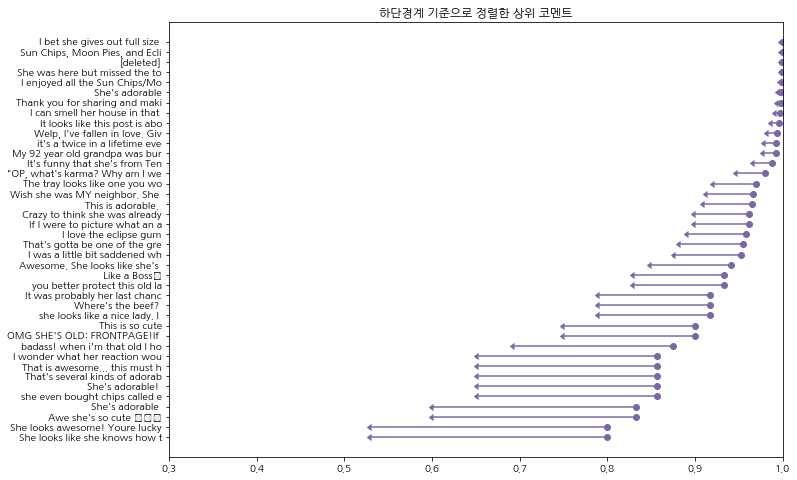

In [17]:
r_order = order[::-1][-40:]
plt.errorbar(posterior_mean[r_order], np.arange(len(r_order)),
             xerr=std_err[r_order],xuplims=True, capsize=0, fmt="o",color="#7A68A6")
plt.xlim(0.3, 1)
plt.yticks(np.arange(len(r_order) - 1, -1, -1), map(lambda x: x[:30].replace("\n", ""), ordered_contents))
plt.title("하단경계 기준으로 정렬한 상위 코멘트");

## 4.4 결론

큰 수의 법칙은 이름에서도 알 수 있듯이 표본의 크기가 큰 경우에만 유용하다. 

1. 사후확률분포에서 많은 표본을 그려봄으로써 기대값을 추정할 때 큰 수의 법칙이 적용됨을 알 수 있다.
2. 베이지안 추론에 따르면 표본 크기가 작으면 문제가 있다. 사후확률 분포는 이를 반영하여 중심에 몰려있기 보다는 넓게 퍼져 있을 것이다. 